In [1]:
import pandas as pd
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')
train.head(3)

,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4


In [2]:
test.head()

,Unnamed: 0,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,2,0,0,2,0,1,1,1
1,1,3,0,2,0,0,0,0,2,0,3
2,2,2,1,3,0,1,2,0,1,1,1
3,3,3,1,1,0,1,0,0,1,1,1
4,4,3,0,1,1,1,0,0,3,0,3


In [3]:
test = test.drop('Unnamed: 0', axis =1)

In [4]:
test

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,0,1,1,1
1,3,0,2,0,0,0,0,2,0,3
2,2,1,3,0,1,2,0,1,1,1
3,3,1,1,0,1,0,0,1,1,1
4,3,0,1,1,1,0,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...
413,3,1,2,0,1,0,0,1,1,1
414,1,0,2,0,3,1,1,1,1,5
415,3,1,2,0,0,0,0,1,1,1
416,3,1,2,0,1,0,0,1,1,1


## Values

AGE <br> 
A <= 16 - 0 <br>
16 < A <= 32 - 1 <br>
32 < A <= 48 - 2 <br>
48 < A <= 64 - 3 <br>
64 < A       - 4<br>
<br>
Fare - ticket prices in pounds <br>
F <= 7.91 - 0 <br>
7.91 < F <= 14.454 - 1 <br>
14.454 < F <= 31 - 2 <br>
31 < F - 3<br>
<br>
Embarked - which port <br>
S - 0<br>
C - 1 <br>
Q - 2<br>
<br>
Title <br>
Mr - 1<br>
Master - 2<br>
Mrs - 3<br>
Miss - 4<br>
Rare - 5<br>

In [5]:
train['Age'][train['Age']>3]=4

In [6]:
train['Age'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [7]:
train = train.drop(['Unnamed: 0'], axis = 1)

In [8]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,0,0,1,1,5
887,1,1,0,1,0,2,0,1,1,1,4
888,0,3,0,2,2,2,0,0,4,0,4
889,1,1,1,1,0,2,1,1,1,1,1


<Axes: title={'center': 'Pearson Correlation of Features'}>

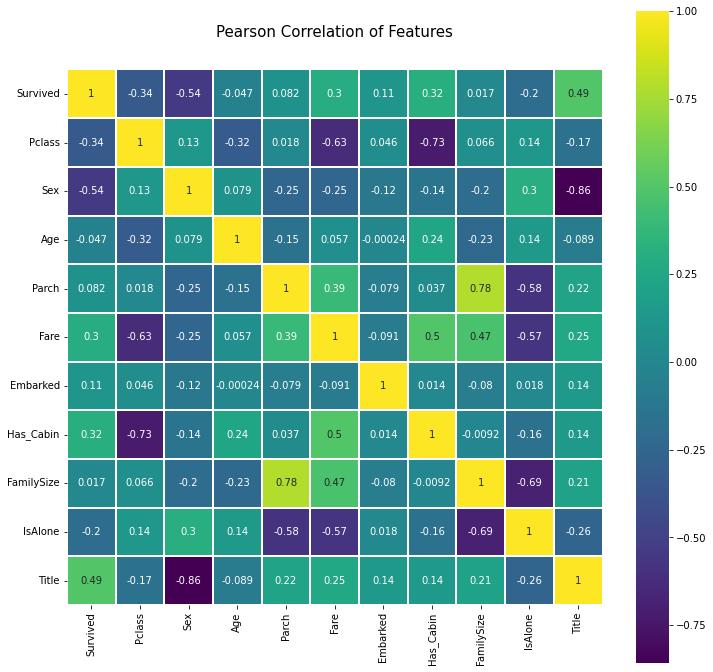

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

The most correlated with the survival label are:
- positively: Title
- negatively: Sex <br>

The most correlated with each other are:
- positively: Parch and FamilySize
- negatively: Sex and Title, FamilySize and IsAlone

### Survival coefficient

In [10]:
train.groupby('Title')['Survived'].mean()

Title
1    0.156673
2    0.575000
3    0.793651
4    0.702703
5    0.347826
Name: Survived, dtype: float64


The highest survival rate corresponds to the titles 3 and 4, which are Mrs and Miss. The lowest corresponds to Mr. We can draw the conclusion that women have a higher survival rate.

In [11]:
x_train = train.drop('Survived', axis = 1)
y_train = train[['Survived']]

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# tree depth
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cv_scores = []

for depth in max_depths:
   
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    
    #10-fold cross validation
    scores = cross_val_score(model, x_train, y_train, cv=10)
    mean_score = scores.mean()
    cv_scores.append(mean_score)

for depth, score in zip(max_depths, cv_scores):
    print("max_depth = {}: {:.4f}".format(depth, score))


max_depth = 1: 0.7823
max_depth = 2: 0.7891
max_depth = 3: 0.8316
max_depth = 4: 0.8215
max_depth = 5: 0.8272
max_depth = 6: 0.8194
max_depth = 7: 0.8092
max_depth = 8: 0.8115
max_depth = 9: 0.8160
max_depth = 10: 0.8115


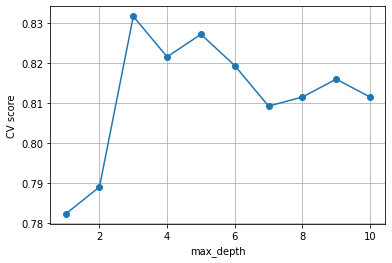

In [13]:
import matplotlib.pyplot as plt

plt.plot(max_depths, cv_scores, '-o')
plt.xlabel('max_depth')
plt.ylabel('CV score')
plt.grid()
plt.show()


I used the entropy criterion for the analysis. Based on the above results, I selected a decision tree depth of 3.

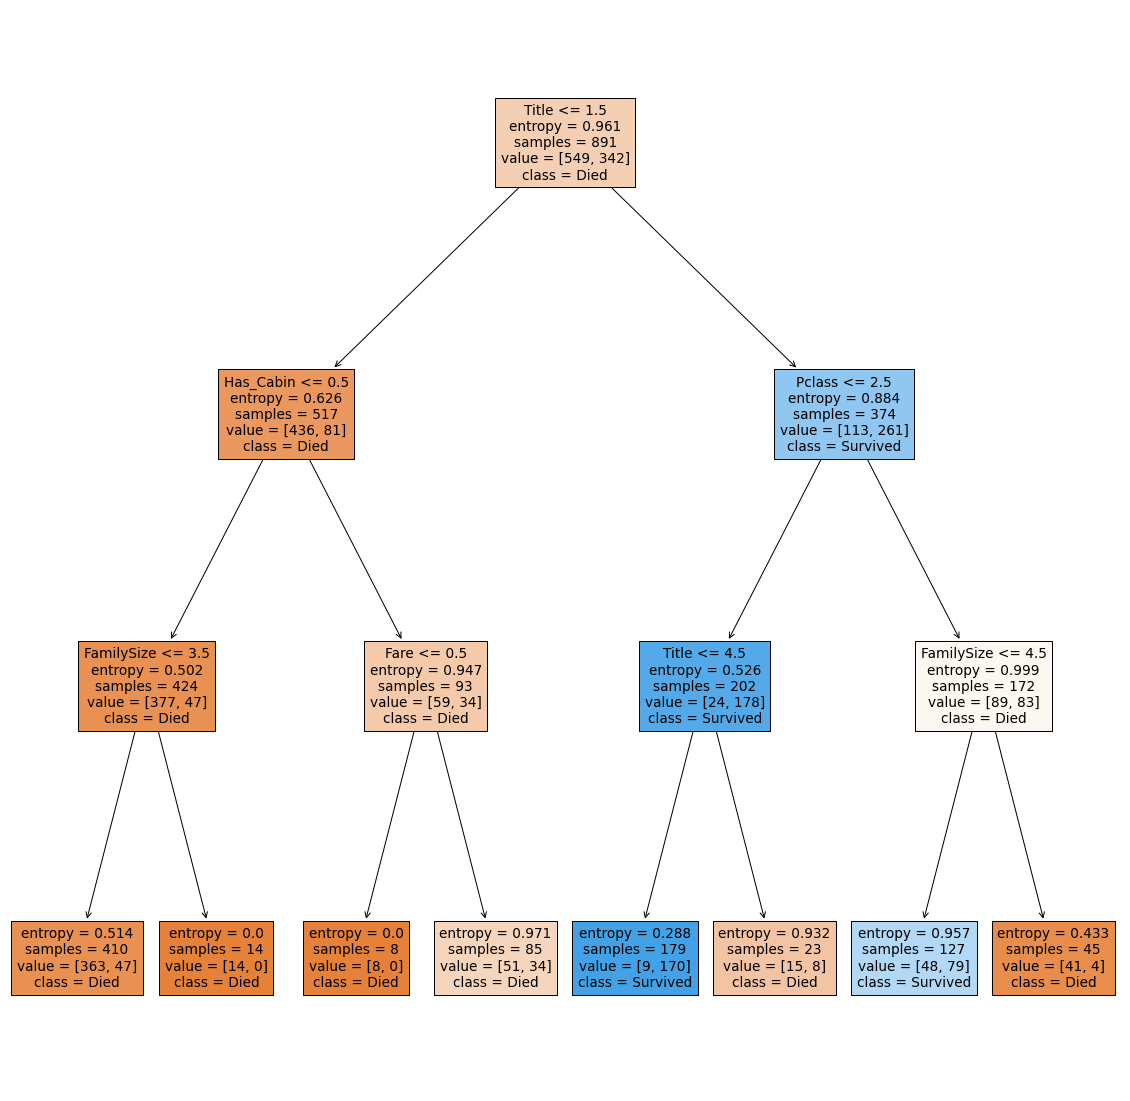

In [14]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy')
decision_tree = decision_tree.fit(x_train, y_train)
tree.plot_tree(decision_tree, filled=True, ax=ax, feature_names=x_train.columns, class_names=["Died", "Survived"])
plt.show()

In [15]:
import numpy as np
y_pred = decision_tree.predict(test)
with open('predykcja.txt', 'w') as f:
    f.write(str(y_pred))
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cv_scores = []

for depth in max_depths:
   
    model = DecisionTreeClassifier(max_depth=depth, criterion='gini')

    scores = cross_val_score(model, x_train, y_train, cv=10)
    mean_score = scores.mean()
    cv_scores.append(mean_score)

for depth, score in zip(max_depths, cv_scores):
    print("max_depth = {}: {:.4f}".format(depth, score))


max_depth = 1: 0.7823
max_depth = 2: 0.7913
max_depth = 3: 0.8305
max_depth = 4: 0.8125
max_depth = 5: 0.8103
max_depth = 6: 0.8070
max_depth = 7: 0.8126
max_depth = 8: 0.8126
max_depth = 9: 0.8238
max_depth = 10: 0.8239


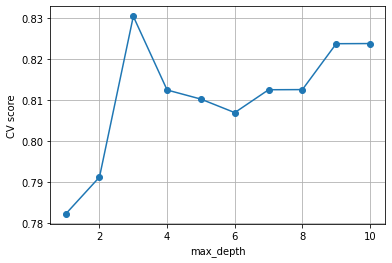

In [19]:
import matplotlib.pyplot as plt

plt.plot(max_depths, cv_scores, '-o')
plt.xlabel('max_depth')
plt.ylabel('CV score')
plt.grid()
plt.show()

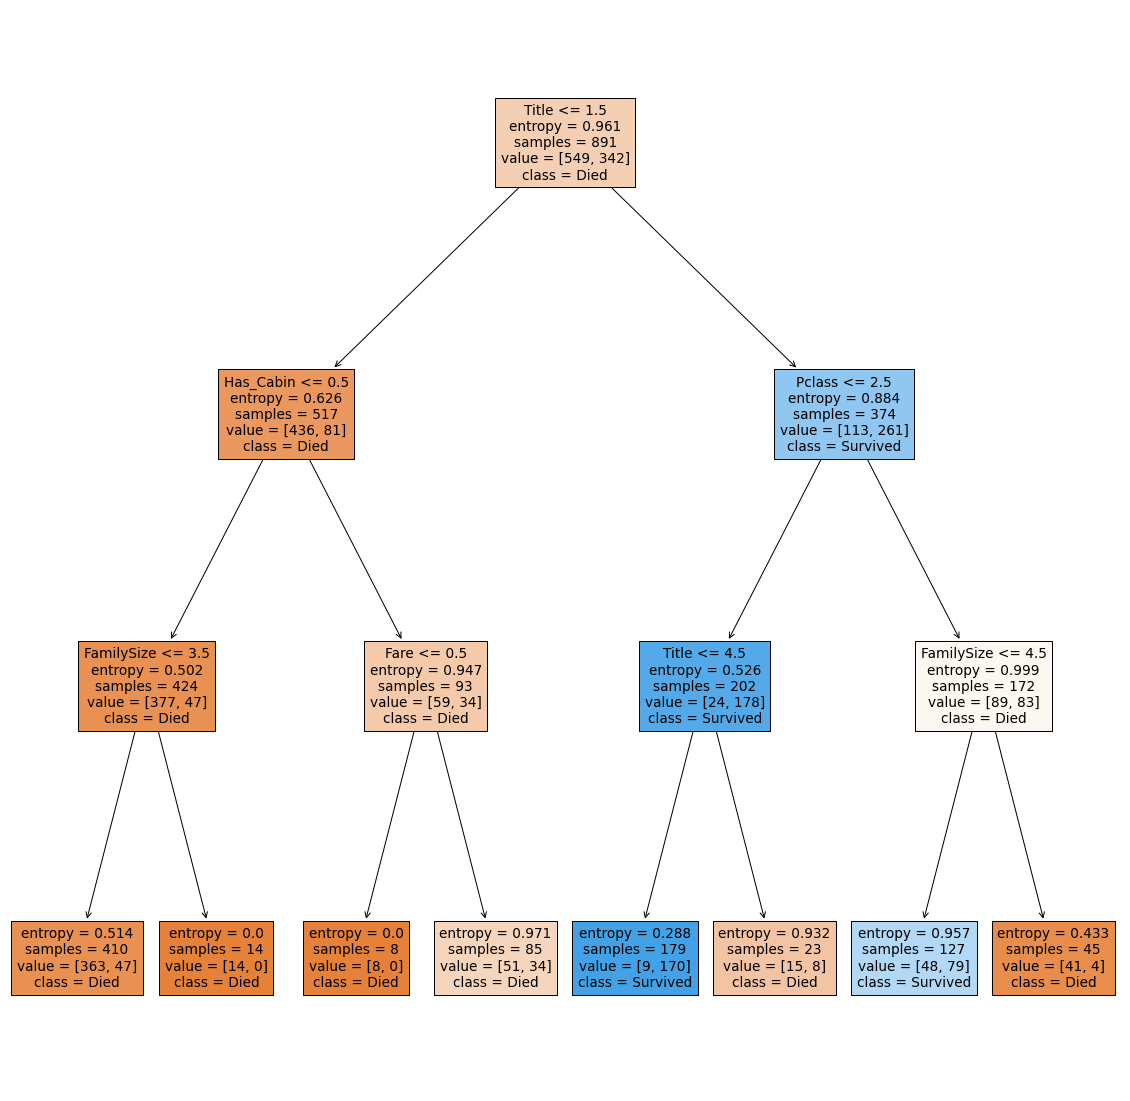

In [20]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy', min_samples_leaf = 5)
decision_tree = decision_tree.fit(x_train, y_train)
tree.plot_tree(decision_tree, filled=True, ax=ax, feature_names=x_train.columns, class_names=["Died", "Survived"])
plt.show()


Analyzing the split criterion of gini vs entropy, we can see that the decision trees are identical for a maximum depth of 3. However, the difference can be observed in the maximum depth plot. The values are slightly different, but it can be noticed that the highest cross-validation score in both cases corresponds to a value of 3.

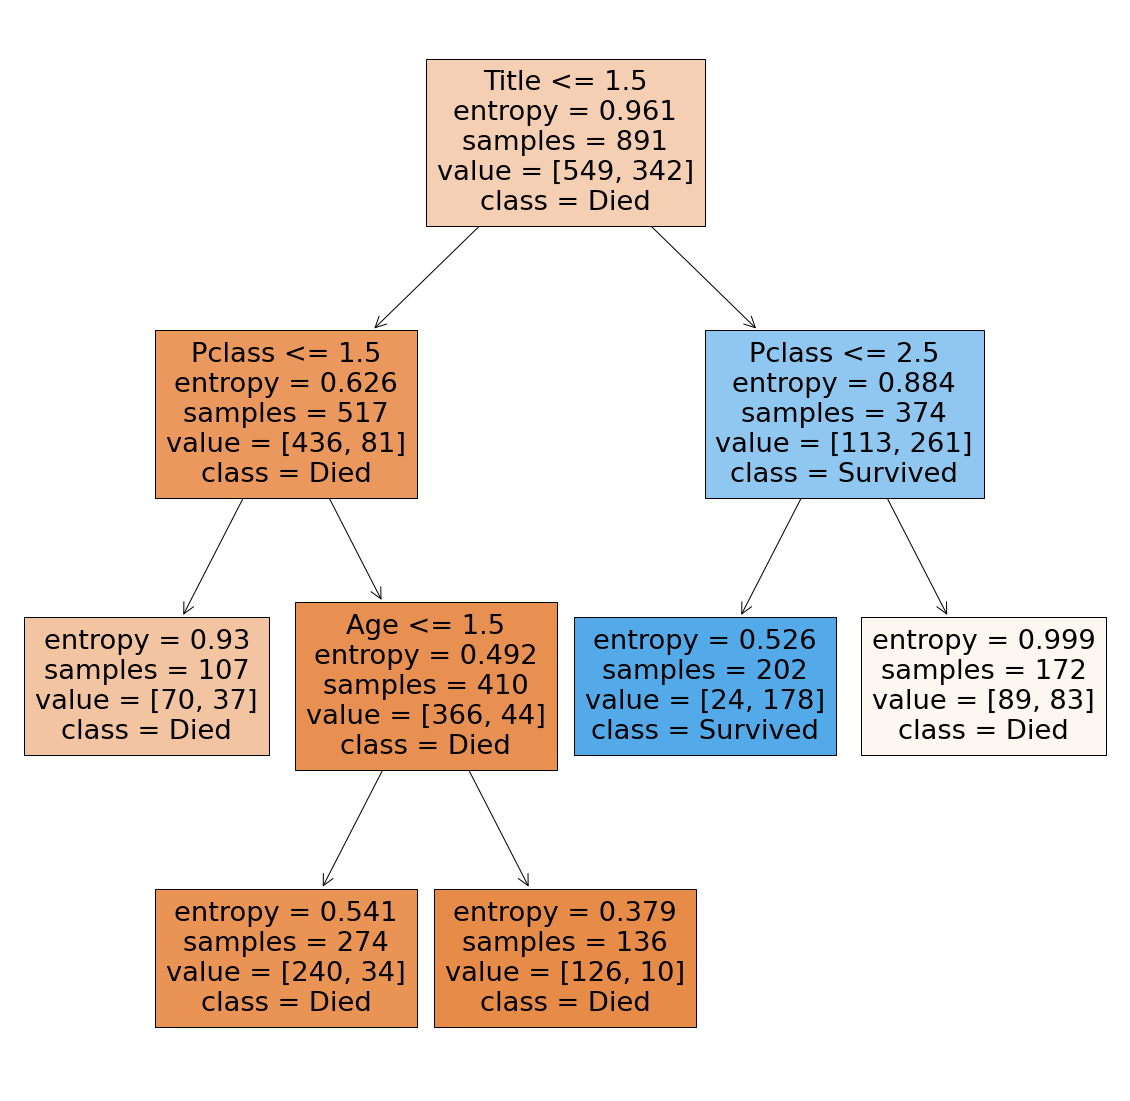

In [21]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy', min_samples_leaf=100)
decision_tree = decision_tree.fit(x_train, y_train)
tree.plot_tree(decision_tree, filled=True, ax=ax, feature_names=x_train.columns, class_names=["Died", "Survived"])
plt.show()


Above, we took a value of 100 as the smallest number of records in a leaf. As a result, we obtained fewer leaves, so our model may be less accurate compared to the previous model where the number of records was 5.

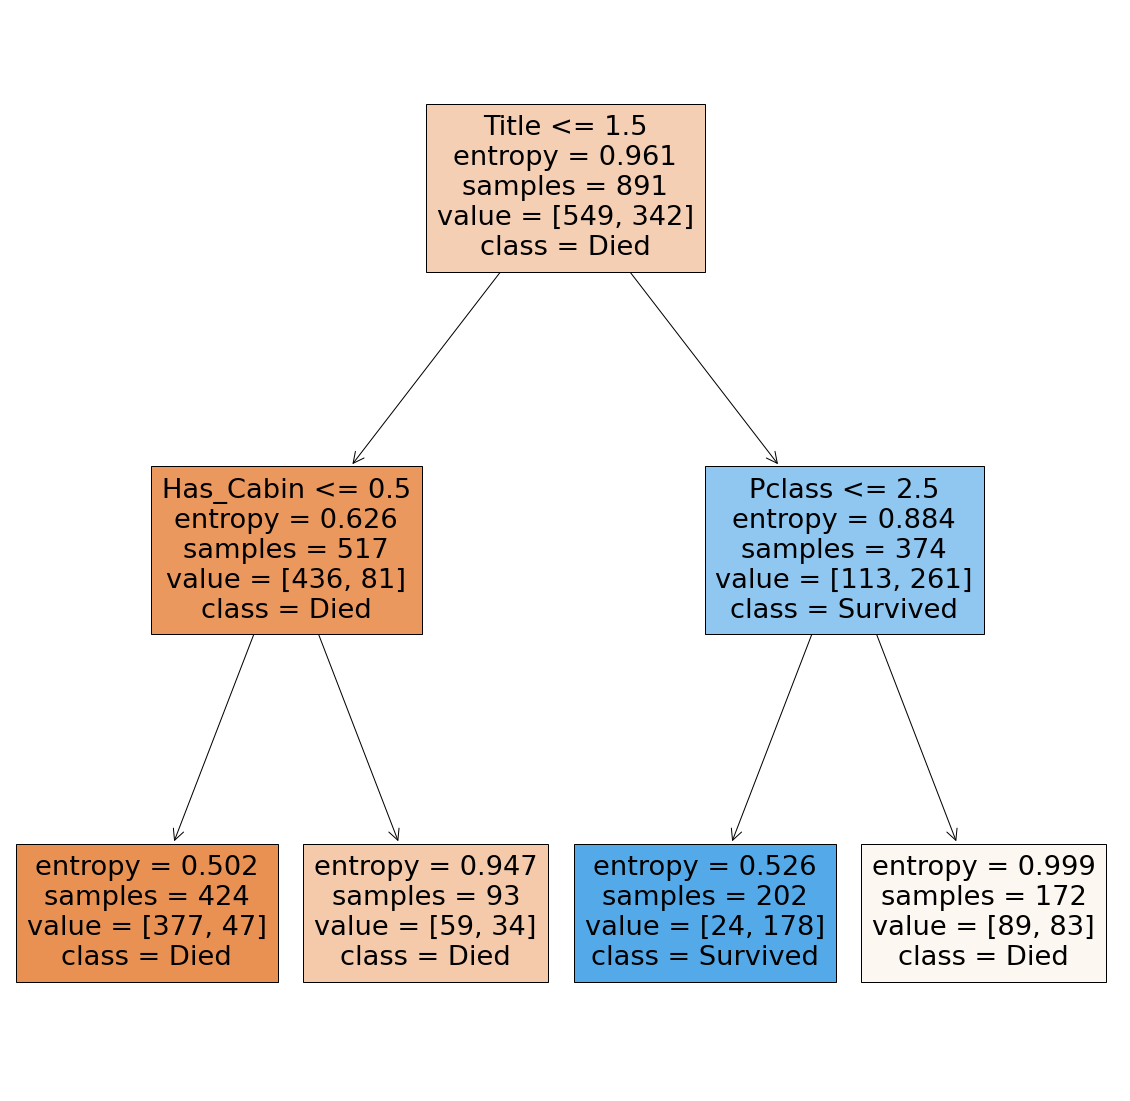

In [22]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
decision_tree = tree.DecisionTreeClassifier(max_depth = 2, criterion='entropy')
decision_tree = decision_tree.fit(x_train, y_train)
tree.plot_tree(decision_tree, filled=True, ax=ax, feature_names=x_train.columns, class_names=["Died", "Survived"])
plt.show()


If we take too small of a tree depth (here equal to 2), the tree will be too simple and will not be able to capture complex relationships between explanatory variables and the target variable. For our case, this is too simple of a model.

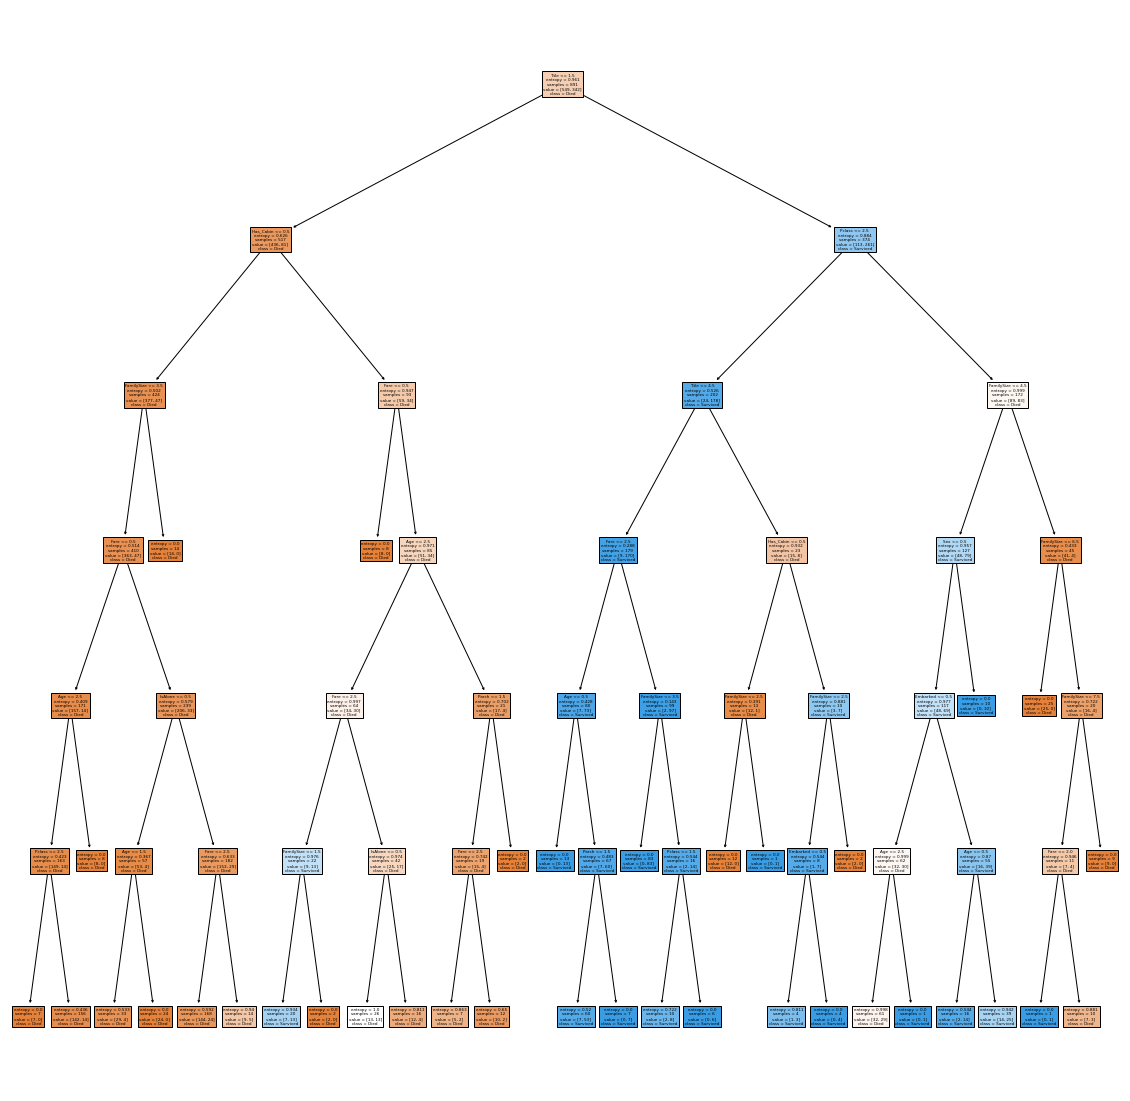

In [23]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
decision_tree = tree.DecisionTreeClassifier(max_depth = 6, criterion='entropy')
decision_tree = decision_tree.fit(x_train, y_train)
tree.plot_tree(decision_tree, filled=True, ax=ax, feature_names=x_train.columns, class_names=["Died", "Survived"])
plt.show()

If we take a tree with too much depth, our model becomes complex. Individual nodes represent complex splits with multiple levels of decision making. The model becomes difficult to interpret.

In [24]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(x_train, y_train, test_size=0.25)
new_X_train

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
862,1,0,2,0,2,0,1,1,1,3
435,1,0,0,2,3,0,1,4,0,4
428,3,1,2,0,0,2,0,1,1,1
502,3,0,1,0,0,2,0,1,1,4
130,3,1,2,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
333,3,1,0,0,2,0,0,3,0,1
453,1,1,3,0,3,1,1,2,0,1
534,3,0,1,0,1,0,0,1,1,4
879,1,0,3,1,3,1,1,2,0,3


In [25]:
new_X_train.reset_index(drop = True)
new_X_test.reset_index(drop = True)
new_y_train.reset_index(drop = True)
new_y_test.reset_index(drop = True)

,Survived
0,1
1,0
2,1
3,0
4,0
...,...
218,0
219,0
220,0
221,1


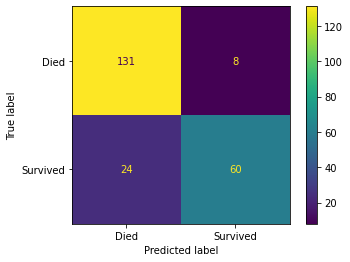

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(new_X_train, new_y_train)

y_pred = clf.predict(new_X_test)

cm = confusion_matrix(new_y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot()
plt.show()


In [27]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(new_y_test, y_pred, target_names=['Died', 'Survived'], output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)
print(df)


              precision    recall  f1-score
Died           0.845161  0.942446  0.891156
Survived       0.882353  0.714286  0.789474
accuracy       0.856502  0.856502  0.856502
macro avg      0.863757  0.828366  0.840315
weighted avg   0.859171  0.856502  0.852854


### k-NN


In [28]:
df = pd.read_csv('nyt-frame1.csv')
df.head()

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df = df.drop('Unnamed: 0', axis=1)

In [30]:
df

,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Dimensionality reduction to 10.


In [31]:
from sklearn.decomposition import PCA
data = df.iloc[:,9:]
target = df['class.labels']
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(data.values)

For k = 1 accuracy is 0.8536363636363635.
For k = 3 accuracy is 0.8518181818181819.
For k = 5 accuracy is 0.8327272727272728.
For k = 7 accuracy is 0.8127272727272727.


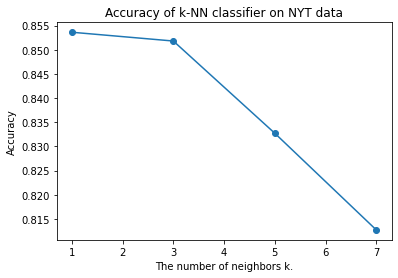

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_nyt = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn_nyt, X_pca, target, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('The number of neighbors k.')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN classifier on NYT data')
plt.show()

For k = 1 accuracy is 0.8536363636363635.
For k = 3 accuracy is 0.8518181818181819.
For k = 5 accuracy is 0.8327272727272728.
For k = 7 accuracy is 0.8127272727272727.


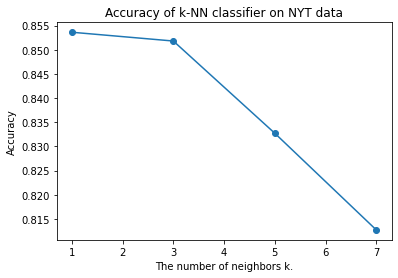

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_nyt = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'euclidean')
    scores = cross_val_score(knn_nyt, X_pca, target, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('The number of neighbors k.')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN classifier on NYT data')
plt.show()

For k = 1 accuracy is 0.8527272727272728.
For k = 3 accuracy is 0.8027272727272727.
For k = 5 accuracy is 0.8027272727272727.
For k = 7 accuracy is 0.8218181818181819.


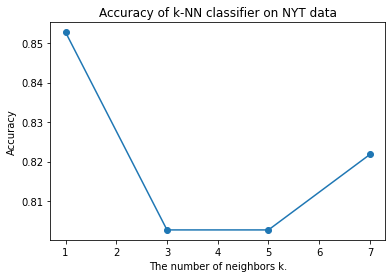

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_nyt = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'manhattan')
    scores = cross_val_score(knn_nyt, X_pca, target, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('The number of neighbors k.')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN classifier on NYT data')
plt.show()

The Euclidean metric is the default metric. Introducing the "distance" weight gives the same results (slight difference for k = 7). However, introducing the Manhattan metric gives noticeable differences. It can be observed that the accuracy for k = 1 and k = 5 is the same.

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
x_iris = iris.data
y_iris = iris.target


For k = 1 accuracy is 0.96.
For k = 3 accuracy is 0.9666666666666666.
For k = 5 accuracy is 0.9666666666666668.
For k = 7 accuracy is 0.9666666666666668.


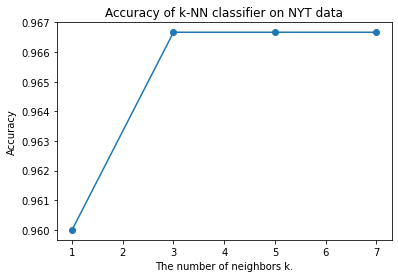

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_iris = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn_iris, x_iris, y_iris, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('The number of neighbors k.')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN classifier on NYT data')
plt.show()

For k = 1 accuracy is 0.96.
For k = 3 accuracy is 0.9666666666666666.
For k = 5 accuracy is 0.9666666666666668.
For k = 7 accuracy is 0.9666666666666668.


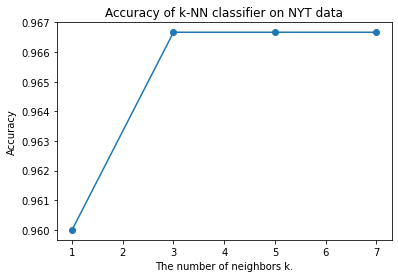

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_iris = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'euclidean' )
    scores = cross_val_score(knn_iris, x_iris, y_iris, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('The number of neighbors k.')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN classifier on NYT data')
plt.show()

For k = 1 accuracy is 0.96.
For k = 3 accuracy is 0.9666666666666666.
For k = 5 accuracy is 0.9666666666666668.
For k = 7 accuracy is 0.96.


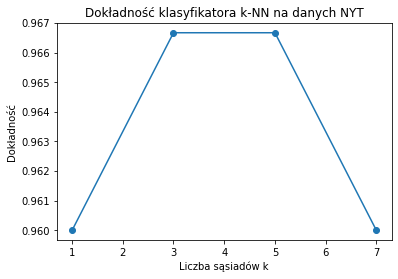

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
ks = [1, 3, 5, 7]
accuracies = []
for k in ks:
    knn_iris = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric = 'manhattan' )
    scores = cross_val_score(knn_iris, x_iris, y_iris, cv=10)
    accuracies.append(scores.mean())
    
for i, j in zip(ks, accuracies):
    print(f"For k = {i} accuracy is {j}.")
    
plt.plot(ks, accuracies, '-o')
plt.xlabel('Liczba sąsiadów k')
plt.ylabel('Dokładność')
plt.title('Dokładność klasyfikatora k-NN na danych NYT')
plt.show()

The Euclidean metric is the default metric. Introducing the "distance" weight does not change the accuracy values, while the Manhattan metric changes the accuracy value for k = 7.